### Calculating the expected Return (Portfolio of Securities)

Assumption:
- security was all bought on the same day
- 

1. Obtain the simple return of the securities in the portfolio and store the results in a new table. <br> 
2. First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”. <br> 
3. Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights. <br> 
4. Transform the result into a percentage form.  <br> 
5. Apply markowitz model to find frontier  <br> 

$$
r_p = w_1 r_1 + w_2 r_2 + ... + w_n r_n
$$

### Import packages

In [2]:
import numpy as np #to work with multidimensional arrays
import pandas as pd #PANel DAta, organise arrays in tables and attach descriptive labels, time series and big database
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import random as rand #random number generator

In [26]:
tickers=['AAPL', 'MSFT','TSLA','BA','AIR','EZJ'] #create list of tickers
weights=[100/6,100/6,100/6,100/6,100/6,100/6] #initiate weights of portfolio here
new_Data=pd.DataFrame()
for t in tickers:
    new_Data[t] = wb.DataReader(t,data_source='yahoo',start='2015-1-1')['Adj Close']

new_Data.head()

,AAPL,MSFT,TSLA,BA,AIR,EZJ
Date,,,,,,
2014-12-31,25.137676,41.263744,44.481998,112.812035,26.378405,24.437479
2015-01-02,24.898552,41.539135,43.862000,112.786011,25.837156,24.586565
2015-01-05,24.197117,41.157158,42.018002,112.004875,25.390865,23.926779
2015-01-06,24.199400,40.553074,42.256001,110.685638,24.764168,23.200378
2015-01-07,24.538729,41.068310,42.189999,112.404106,25.087015,23.774519


### Normalization to 100:
Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

$$
\frac {P_t}{P_0} * 100
$$

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

In [21]:
new_Data.iloc[0] #extract the first row of data see notes on loc and iloc, different indexing and different benefits

AAPL     25.137676
MSFT     41.263744
TSLA     44.481998
BA      112.812035
AIR      26.378405
EZJ      24.437479
Name: 2014-12-31 00:00:00, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

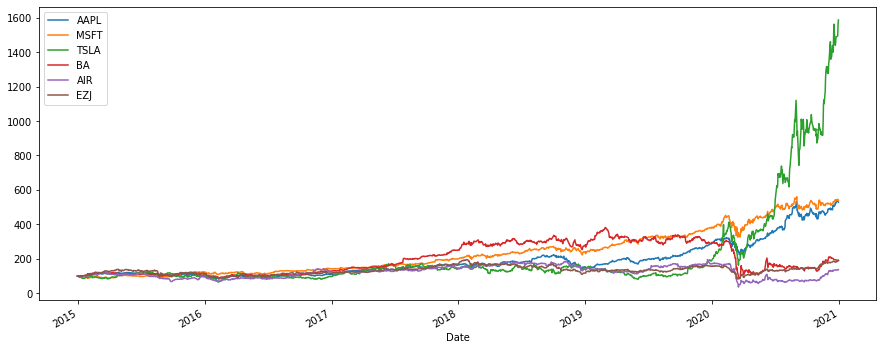

In [22]:
(new_Data/new_Data.iloc[0]*100).plot(figsize=(15,6));
plt.show #shows nett change from start of measurement i.g. 2015-1-1, when would be a good snapshot to check?

In [29]:
returns= (new_Data/new_Data.shift(1))-1
returns.tail

<bound method NDFrame.tail of                 AAPL      MSFT      TSLA        BA       AIR       EZJ
Date                                                                  
2014-12-31       NaN       NaN       NaN       NaN       NaN       NaN
2015-01-02 -0.009513  0.006674 -0.013938 -0.000231 -0.020519  0.006101
2015-01-05 -0.028172 -0.009196 -0.042041 -0.006926 -0.017273 -0.026835
2015-01-06  0.000094 -0.014677  0.005664 -0.011778 -0.024682 -0.030359
2015-01-07  0.014022  0.012705 -0.001562  0.015526  0.013037  0.024747
...              ...       ...       ...       ...       ...       ...
2020-12-24  0.007712  0.007827  0.024444 -0.011562 -0.013070 -0.007611
2020-12-28  0.035766  0.009921  0.002901 -0.004881  0.008171  0.018949
2020-12-29 -0.013315 -0.003601  0.003465  0.000740 -0.010062  0.025017
2020-12-30 -0.008527 -0.011019  0.043229  0.001942  0.021457  0.000648
2020-12-31 -0.007703  0.003338  0.015674 -0.012046  0.001106  0.007123

[1512 rows x 6 columns]>

In [30]:
annual_returns = returns.mean()*250
annual_returns

AAPL    0.318972
MSFT    0.317202
TSLA    0.608120
BA      0.195760
AIR     0.178109
EZJ     0.164779
dtype: float64

In [34]:
wArray = np.array(weights) #weights initiated 
#take dot product of 2 matrices
np.dot(annual_returns, wArray)

29.715694804180306

In [36]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1) #but these are for the same date, how to find for separate buy dates(?), use simple return and use weights to calculate 

2971.569 %


### Calculating the Simple return (Indices)
Indices can be used as a gauge of the economy and portfolios/single securities can be gauged against them


In [60]:
tickers=['^GSPC', '^IXIC', '^GDAXI'] #create list of tickers
ind_Data = pd.DataFrame()
for t in tickers:
    ind_Data[t] = wb.DataReader(t,data_source='yahoo',start='2005-1-2')['Adj Close']
ind_Data

,^GSPC,^IXIC,^GDAXI
Date,,,
2005-01-03,1202.079956,2152.149902,4291.529785
2005-01-04,1188.050049,2107.860107,4290.500000
2005-01-05,1183.739990,2091.239990,4258.240234
2005-01-06,1187.890015,2090.000000,4300.939941
2005-01-07,1186.189941,2088.610107,4316.399902
...,...,...,...
2020-12-24,3703.060059,12804.730469,NaN
2020-12-28,3735.360107,12899.419922,13790.290039
2020-12-29,3727.040039,12850.219727,13761.379883


Plot indices

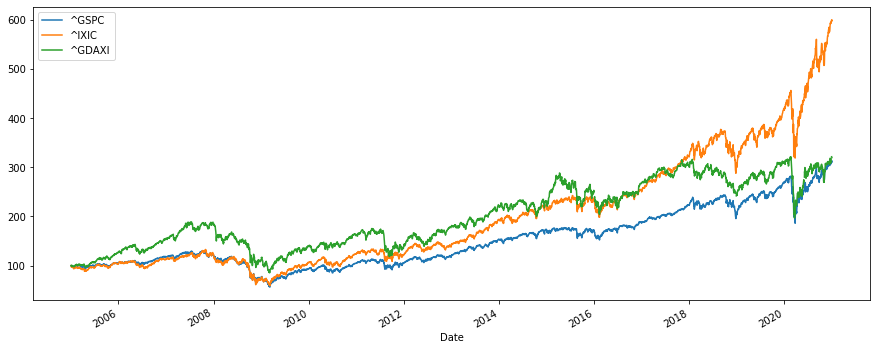

In [61]:
(ind_Data / ind_Data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show() #look at indices from each crash 

Calculate mean simple returns on indices

In [67]:
ind_returns = (ind_Data / ind_Data.shift(1)) - 1
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.090210
^IXIC     0.133932
^GDAXI    0.084506
dtype: float64

### Calculating the Simple return (Indices)

Comparing single security to indices

In [76]:
tickers=['AAPL', '^IXIC', '^GSPC'] #create list of tickers
ind_Sec_Data = pd.DataFrame()
for t in tickers:
    ind_Sec_Data[t] = wb.DataReader(t,data_source='yahoo',start='2011-1-2')['Adj Close']
ind_Sec_Data

,AAPL,^IXIC,^GSPC
Date,,,
2011-01-03,10.153708,2691.520020,1271.869995
2011-01-04,10.206702,2681.250000,1270.199951
2011-01-05,10.290195,2702.199951,1276.560059
2011-01-06,10.281874,2709.889893,1273.849976
2011-01-07,10.355506,2703.169922,1271.500000
...,...,...,...
2020-12-24,131.970001,12804.730469,3703.060059
2020-12-28,136.690002,12899.419922,3735.360107
2020-12-29,134.869995,12850.219727,3727.040039


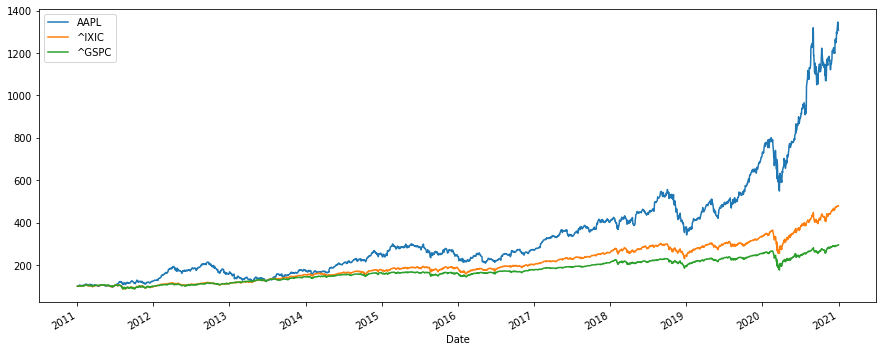

In [77]:
(ind_Sec_Data/ind_Sec_Data.iloc[0]*100).plot(figsize=(15,6));
plt.show()

### Applying CAPM model to optimise portfolio
Indices can be used as a gauge of the economy and portfolios/single securities can be gauged against them
